<a href="https://colab.research.google.com/github/cris9005/MSDS_458_Public/blob/main/Martinez_458_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 2
10 DNN & CNN Models


In [1]:
import numpy as np
import pandas as pd
from packaging import version

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as k

In [2]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [3]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.12.0


In [ ]:
print("Keras version: ", keras.__version__)

Keras version:  2.12.0


In [ ]:
def get_three_classes(x, y):
    def indices_of(class_id):
        indices, _ = np.where(y == float(class_id))
        return indices

    indices = np.concatenate([indices_of(0), indices_of(1), indices_of(2)], axis=0)

    x = x[indices]
    y = y[indices]

    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)

    x = x[indices]
    y = y[indices]

    y = tf.keras.utils.to_categorical(y)

    return x, y

In [ ]:
def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)

    x = x[indices]
    y = y[indices]
    p = p[indices]

    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names_preview[np.argmax(p[i])], color=col)
    plt.show()

#Loading cifar10 Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [5]:
#EDA Training and Test Datasets
#Imported 50000 examples for training and 10000 examples for test
#Imported 50000 labels for training and 10000 labels for test
print('train_images:\t{}'.format(x_train.shape))
print('train_labels:\t{}'.format(y_train.shape))
print('test_images:\t\t{}'.format(x_test.shape))
print('test_labels:\t\t{}'.format(y_test.shape))

train_images:	(50000, 32, 32, 3)
train_labels:	(50000, 1)
test_images:		(10000, 32, 32, 3)
test_labels:		(10000, 1)


In [ ]:
#Review Labels
print("First ten labels training dataset:\n {}\n".format(y_train[0:10]))
print("This output the numeric label, need to convert to item description")

First ten labels training dataset:
 [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]

This output the numeric label, need to convert to item description


In [7]:
#Preprocessing Data for Model Development
class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog'
,'horse'
,'ship'
,'truck']

In [6]:
#Create Validation Data Set
x_train_split, x_valid_split, y_train_split, y_valid_split = train_test_split(x_train
                                                                              ,y_train
                                                                              ,test_size=.1
                                                                              ,random_state=42
                                                                              ,shuffle=True)


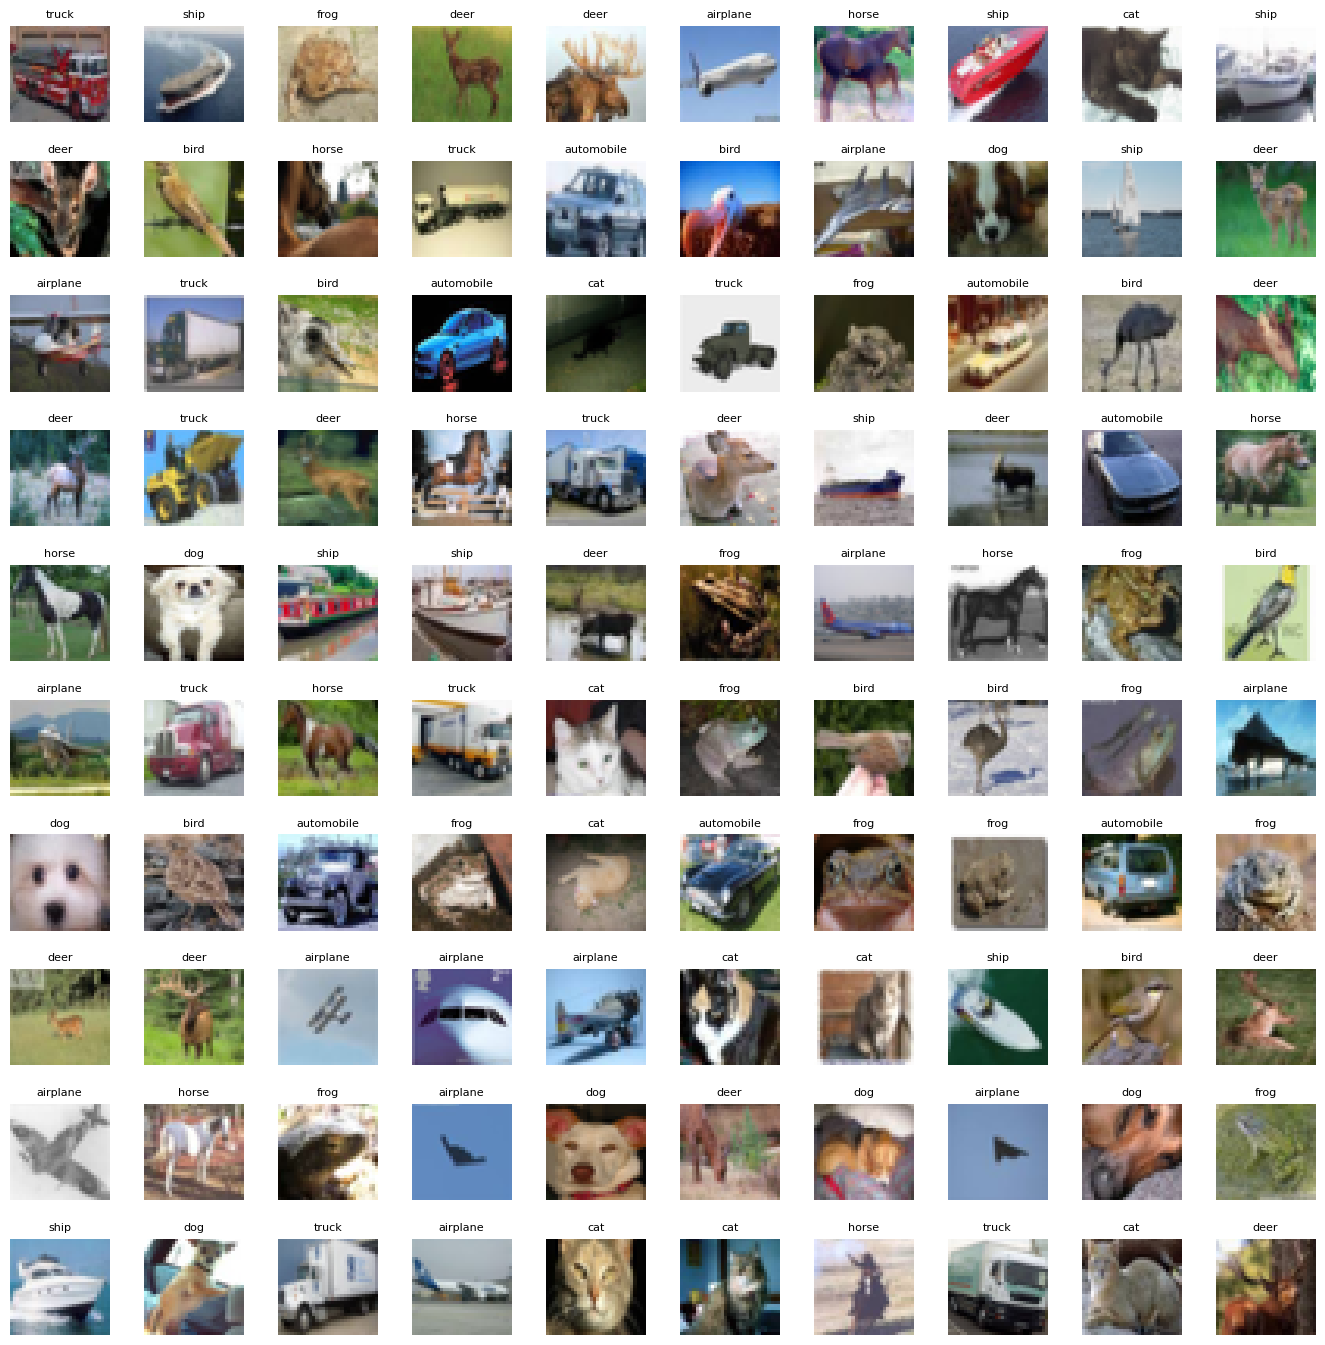

In [ ]:
# Define the labels of the dataset
#labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
 #         'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Confirm Datasets {Train, Validation, Test}

In [148]:
print(x_train_split.shape, x_valid_split.shape, x_test.shape)


(45000, 32, 32, 3) (5000, 32, 32, 3) (10000, 32, 32, 3)


In [7]:
x_train_norm = x_train_split/255
x_valid_norm = x_valid_split/255
x_test_norm = x_test/255

In [8]:
print(y_train_split.shape, y_valid_split.shape, y_test.shape)


(45000, 1) (5000, 1) (10000, 1)


In [9]:
print(x_train_norm.shape, x_valid_norm.shape, x_test_norm.shape)


(45000, 32, 32, 3) (5000, 32, 32, 3) (10000, 32, 32, 3)


Rescale Examples {Train, Validation, Test}

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255

Each element in each example is a pixel value
Pixel values range from 0 to 255
0 = black
255 = white


#Model and Performance Functions


In [10]:
def compile_train_model(model, x_train, y_train, x_valid, y_valid, epochs=200):

  # Compile
  model.compile(optimizer='rmsprop',
                loss = 'SparseCategoricalCrossentropy',
                metrics=['accuracy'])

 # Train
  history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=512,
    validation_data=(x_valid, y_valid),
    #verbose=0,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint("CNN_model.h5",save_best_only=True,save_weights_only=False)
        ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
        ]
  )

  print('Model performance with training set')
  model.evaluate(x_train, y_train)

  print('Evaluating model performance with validation set')
  model.evaluate(x_valid, y_valid)

  return history, model

In [11]:
def plot_history(history):
  losses = history.history['loss']
  accs = history.history['accuracy']
  val_losses = history.history['val_loss']
  val_accs = history.history['val_accuracy']
  epochs = len(losses)

  plt.figure(figsize=(16, 4))
  for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
  plt.show()

def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

In [12]:
def print_validation_report(y_test, predictions):
    print("Classification Report")
    print(classification_report(y_test, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(y_test, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(y_test, predictions))))

In [13]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(16,12))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

#Experiment 1: DNN with 2 layers (no regulationzation)





In [ ]:
DNN_X_train=x_train_norm.reshape(x_train_norm.shape[0], 3072)
DNN_X_test=x_test_norm.reshape(x_test_norm.shape[0], 3072)

In [80]:
model_1 = Sequential([
    Dense(units = 128, activation = 'relu',input_shape=x_train_norm.shape[1:]),
    Flatten(),
    Dense(units = 10, activation="softmax")])

In [81]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32, 32, 128)       512       
                                                                 
 flatten_6 (Flatten)         (None, 131072)            0         
                                                                 
 dense_17 (Dense)            (None, 10)                1310730   
                                                                 
Total params: 1,311,242
Trainable params: 1,311,242
Non-trainable params: 0
_________________________________________________________________


To lift model accuracy:

add 'relu' activation function to all of our hidden layers. 'relu' helps with the vanishing gradients problem.
To minimize overfitting:

add dropout layer. This layer must be supplied a parameter(from 0 to 1) which is a probability that any node in the network is dropped during training.


#Compilation Step:
 specify the 'loss', 'optimizer', and 'metrics'.

For loss function...

- 'mean_squared_error' (y_true, y_pred)
-'binary_crossentropy' (y_true, y_pred)
- 'categorical_crossentropy' (y_true, y_pred), etc...

For optimizer...
- 'sgd' : Stochastic Gradient Descent
- 'rmsprop' : RMSprop (for recurrent neural networks??)
- 'adagrad' : Adagrad that adapts learning rates, accumulating all past gradients?
- 'adadelta' : a more robust extension of Adagrad that adapts learning rates - based on a moving window of gradient updates?
- 'adam' : Adam
- 'adamax' : Adamax
- 'nadam' : Nesterov Adam optimizer
- 'tfoptimizer' : TFOptimizer


In [212]:
# Model / data parameters
num_classes = 10
# convert class vectors to binary class matrices
y_train_ = keras.utils.to_categorical(y_train, num_classes)
y_test_ = keras.utils.to_categorical(y_test, num_classes)


In [89]:
#Compiling the model
model_1.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [90]:
#Training Model 1
history_1 = model_1.fit(
     x_train_norm
    ,y_train_,
     batch_size=64
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )



Epoch 1/200
563/563 [==============================] - 38s 67ms/step - loss: 2.4300 - accuracy: 0.0991 - val_loss: 2.3030 - val_accuracy: 0.1009
Epoch 2/200
563/563 [==============================] - 37s 66ms/step - loss: 2.3010 - accuracy: 0.1066 - val_loss: 2.3066 - val_accuracy: 0.1006
Epoch 3/200
563/563 [==============================] - 36s 64ms/step - loss: 2.2962 - accuracy: 0.1141 - val_loss: 2.3077 - val_accuracy: 0.1002


Testing the Model 1

In [23]:
history_dict = history_1.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [91]:
# Getting the probability values for each image, based on TEST data
preds_1 = model_1.predict(x_test_norm)
print('shape of preds: ', preds_1.shape)

313/313 [==============================] - 3s 10ms/step
shape of preds:  (10000, 10)


In [ ]:
#Getting the ultimate predicted classes based on TRAINING data
pred_classes_1 = np.argmax(model.predict(x_train_norm), axis=-1)
print('shape of pred_classes: ', pred_classes_1.shape)

In [104]:
# Getting ultimate accuracy score
loss_1, accuracy_1 = model_1.evaluate(x_test_norm, y_test_)
print('test set accuracy: ', accuracy_1 * 100)

313/313 [==============================] - 3s 10ms/step - loss: 2.3109 - accuracy: 0.1028
test set accuracy:  10.279999673366547


Model 1 Performance Metrics

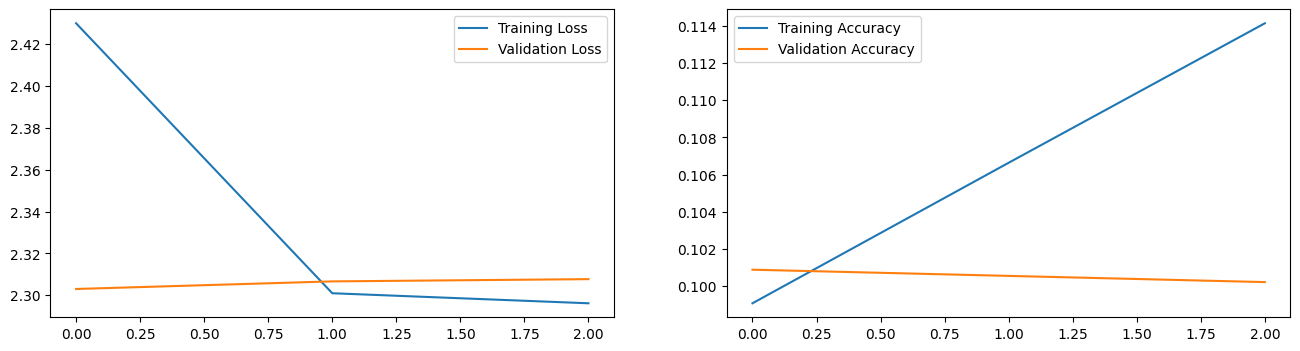

In [92]:
plot_history(history_1)

In [93]:
# Getting the probability values for each image, based on TEST data
pred1= model_1.predict(x_test_norm)
pred1=np.argmax(pred1, axis=1)

313/313 [==============================] - 3s 9ms/step


In [94]:
print_validation_report(y_test,pred1)

Classification Report
              precision    recall  f1-score   support

           0       0.11      0.05      0.07      1000
           1       0.12      0.20      0.15      1000
           2       0.07      0.02      0.03      1000
           3       0.13      0.02      0.04      1000
           4       0.07      0.17      0.10      1000
           5       0.12      0.04      0.06      1000
           6       0.13      0.44      0.20      1000
           7       0.06      0.01      0.02      1000
           8       0.06      0.05      0.05      1000
           9       0.10      0.03      0.04      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.08     10000
weighted avg       0.10      0.10      0.08     10000

Accuracy Score: 0.1028
Root Mean Square Error: 3.8420307130474636


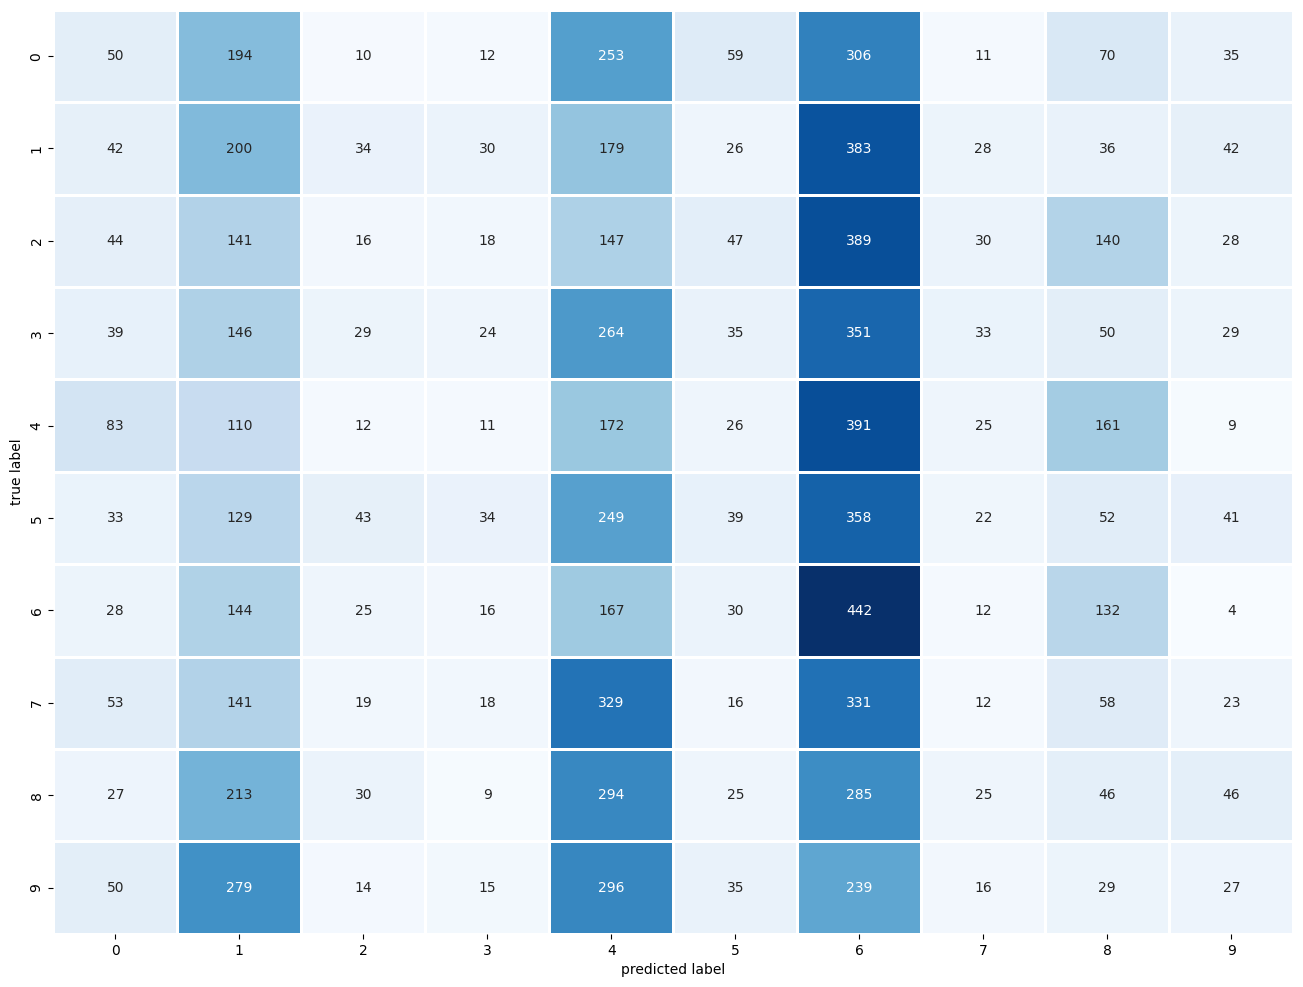

In [95]:
plot_confusion_matrix(y_test,pred1)

In [ ]:
# Getting the ultimate predicted classes based on TRAINING data
pred_classes_1= np.argmax(model_1.predict(x_train_norm), axis=-1)
print('shape of pred_classes: ', pred_classes_1.shape)

#Experiment 2: DNN with 3 layers (no regulationzation)


In [96]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model_2 = Sequential([
    Dense(input_shape=x_train_norm.shape[1:], units = 200, activation = 'relu'),
    Dense(units = 100, activation=tf.nn.relu),
    Flatten(),
    Dense(units = 10, activation="softmax")])

In [97]:
#Compiling the model
model_2.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [98]:
#Training Model 2
history_2 = model_2.fit(
    x_train_norm
    ,y_train_,  batch_size=32
    ,epochs = 120
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
    )

Epoch 1/120
1125/1125 [==============================] - 95s 84ms/step - loss: 2.3166 - accuracy: 0.0989 - val_loss: 2.3180 - val_accuracy: 0.0966
Epoch 2/120
1125/1125 [==============================] - 98s 87ms/step - loss: 2.3034 - accuracy: 0.0974 - val_loss: 2.3027 - val_accuracy: 0.0973
Epoch 3/120
1125/1125 [==============================] - 90s 80ms/step - loss: 2.3030 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.0999
Epoch 4/120
1125/1125 [==============================] - 95s 85ms/step - loss: 2.3032 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.0979
Epoch 5/120
1125/1125 [==============================] - 94s 83ms/step - loss: 2.3035 - accuracy: 0.1010 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/120
1125/1125 [==============================] - 106s 94ms/step - loss: 2.3028 - accuracy: 0.1037 - val_loss: 2.3029 - val_accuracy: 0.0998
Epoch 7/120
1125/1125 [==============================] - 97s 87ms/step - loss: 2.3011 - accuracy: 0.1094 - val_loss: 

#Testing Model 2

Evaluate the model

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the evaluate method on our model.

Predictions

In [99]:
# Getting the probability values for each image, based on TEST data
preds_2 = model_2.predict(x_test_norm)
pred2=np.argmax(preds_2, axis=1)

313/313 [==============================] - 8s 25ms/step


Model 2 Performance Metrics

In [100]:

print_validation_report(y_test,pred2)

Classification Report
              precision    recall  f1-score   support

           0       0.15      0.01      0.01      1000
           1       0.19      0.15      0.17      1000
           2       0.06      0.04      0.05      1000
           3       0.08      0.02      0.03      1000
           4       0.08      0.04      0.05      1000
           5       0.10      0.66      0.18      1000
           6       0.08      0.02      0.04      1000
           7       0.14      0.04      0.07      1000
           8       0.14      0.09      0.11      1000
           9       0.08      0.01      0.02      1000

    accuracy                           0.11     10000
   macro avg       0.11      0.11      0.07     10000
weighted avg       0.11      0.11      0.07     10000

Accuracy Score: 0.107
Root Mean Square Error: 3.391798932719922


Confusion matrices

Using both sklearn.metrics. Then we visualize the confusion matrix and see what that tells us.

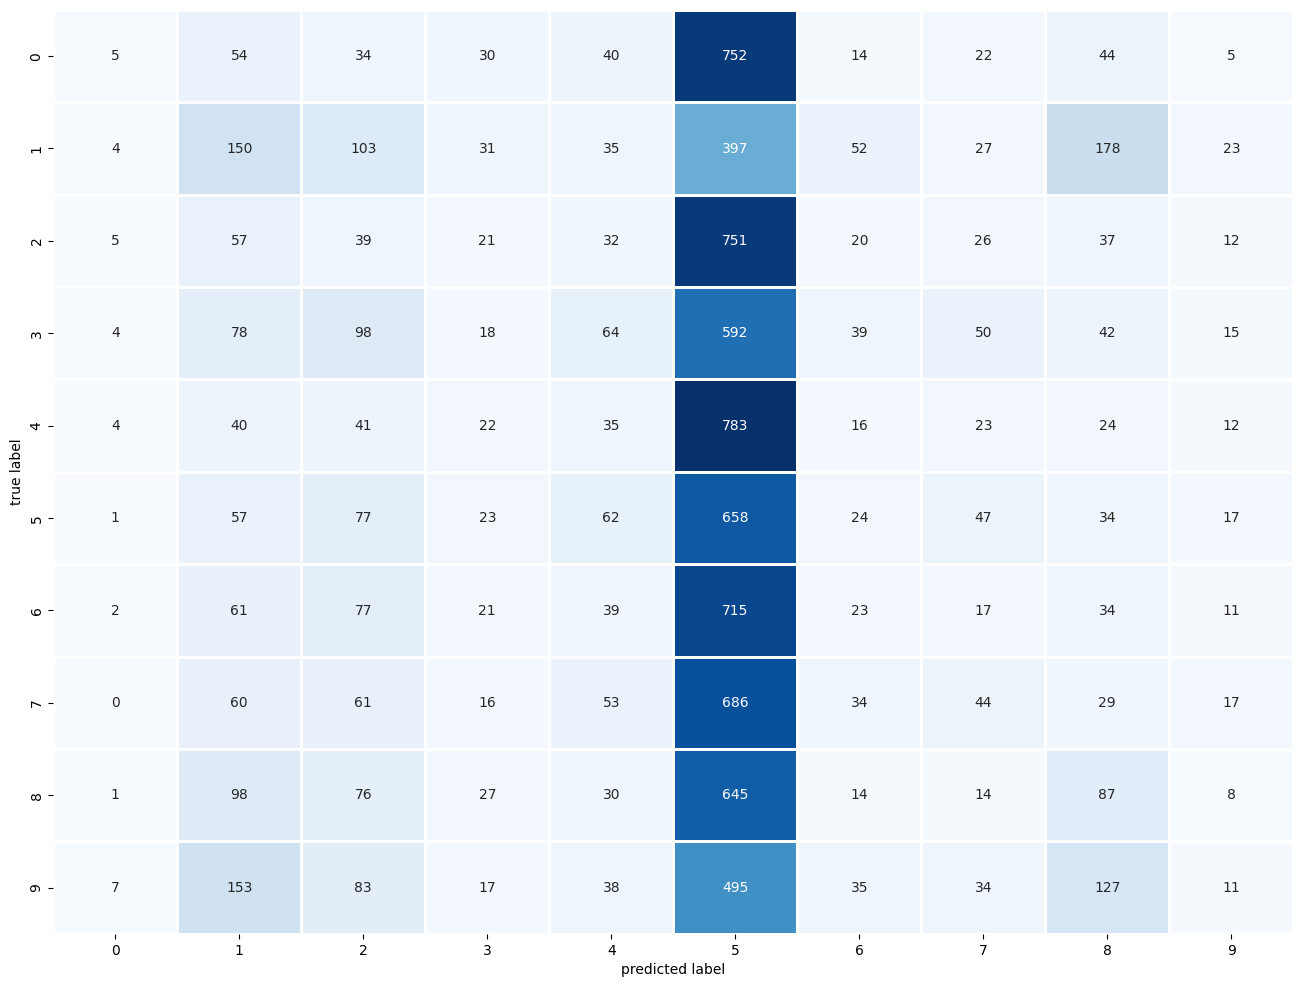

In [101]:
plot_confusion_matrix(y_test,pred2)

Plot Training Metrics (Loss and Accuracy)

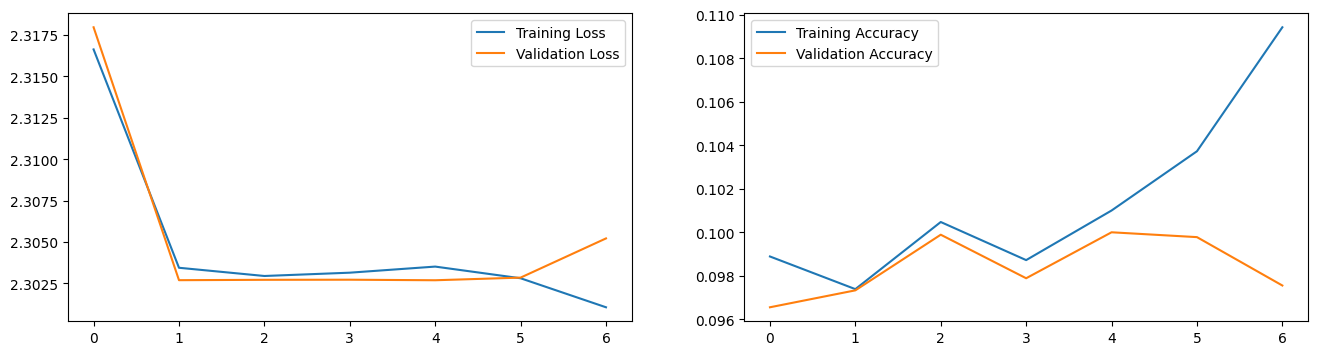

In [102]:
plot_history(history_2)

In [62]:
# Getting the ultimate predicted classes based on TRAINING data
pred_classes_2 = np.argmax(model_2.predict(x_train_norm), axis=1)
print('shape of pred_classes: ', pred_classes_2.shape)

1407/1407 [==============================] - 35s 25ms/step
shape of pred_classes:  (45000,)


#Experiment 3: CNN with 2 layers (no regulationzation)
We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D MaxPooling, Dropout handle feature learning.

In [119]:
#Build CNN Model 3
keras.backend.clear_session()
k.clear_session()
model_3 = Sequential([
  Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=x_train_norm.shape[1:]),
  MaxPool2D((2, 2),strides=2),
  Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu),
  MaxPool2D((2, 2),strides=2),
  Flatten(),
  Dense(units=10, activation=tf.nn.softmax)
])


In [120]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 10)                9

In [125]:
y_train_split.shape

(45000, 1)

In [156]:
# Compile and train
history_3, model_3 = compile_train_model(model_3,
                                     x_train_norm, y_train_split,
                                     x_valid_norm, y_valid_split)

Epoch 1/200
88/88 [==============================] - 185s 2s/step - loss: 0.9995 - accuracy: 0.6604 - val_loss: 0.9796 - val_accuracy: 0.6576
Epoch 2/200
88/88 [==============================] - 175s 2s/step - loss: 0.9428 - accuracy: 0.6775 - val_loss: 1.0878 - val_accuracy: 0.6210
Epoch 3/200
88/88 [==============================] - 175s 2s/step - loss: 0.9064 - accuracy: 0.6899 - val_loss: 0.9388 - val_accuracy: 0.6692
Epoch 4/200
88/88 [==============================] - 186s 2s/step - loss: 0.8723 - accuracy: 0.7023 - val_loss: 1.0093 - val_accuracy: 0.6516
Epoch 5/200
88/88 [==============================] - 174s 2s/step - loss: 0.8459 - accuracy: 0.7125 - val_loss: 0.9707 - val_accuracy: 0.6608
Epoch 6/200
88/88 [==============================] - 171s 2s/step - loss: 0.8113 - accuracy: 0.7217 - val_loss: 0.9674 - val_accuracy: 0.6710
Epoch 7/200
88/88 [==============================] - 171s 2s/step - loss: 0.7796 - accuracy: 0.7325 - val_loss: 1.0414 - val_accuracy: 0.6482
Epoch 

KeyboardInterrupt: ignored

In [157]:
print('Evaluating model performance with validation set')
model_3.evaluate(x_test_norm, y_test)

Evaluating model performance with validation set
313/313 [==============================] - 10s 32ms/step - loss: 0.9081 - accuracy: 0.7049


[0.9080520272254944, 0.7049000263214111]

In [158]:
plot_history(history_3)

NameError: ignored

In [159]:
# Getting the probability values for each image, based on TEST data
preds_3 = model_3.predict(x_test_norm)
pred3=np.argmax(preds_3, axis=1)

313/313 [==============================] - 9s 30ms/step


In [160]:
print_validation_report(y_test,pred3)

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      1000
           1       0.85      0.81      0.83      1000
           2       0.64      0.59      0.61      1000
           3       0.46      0.66      0.54      1000
           4       0.68      0.65      0.66      1000
           5       0.60      0.65      0.62      1000
           6       0.91      0.59      0.72      1000
           7       0.79      0.75      0.77      1000
           8       0.86      0.75      0.80      1000
           9       0.80      0.80      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.73      0.70      0.71     10000
weighted avg       0.73      0.70      0.71     10000

Accuracy Score: 0.7049
Root Mean Square Error: 2.2379454863780754


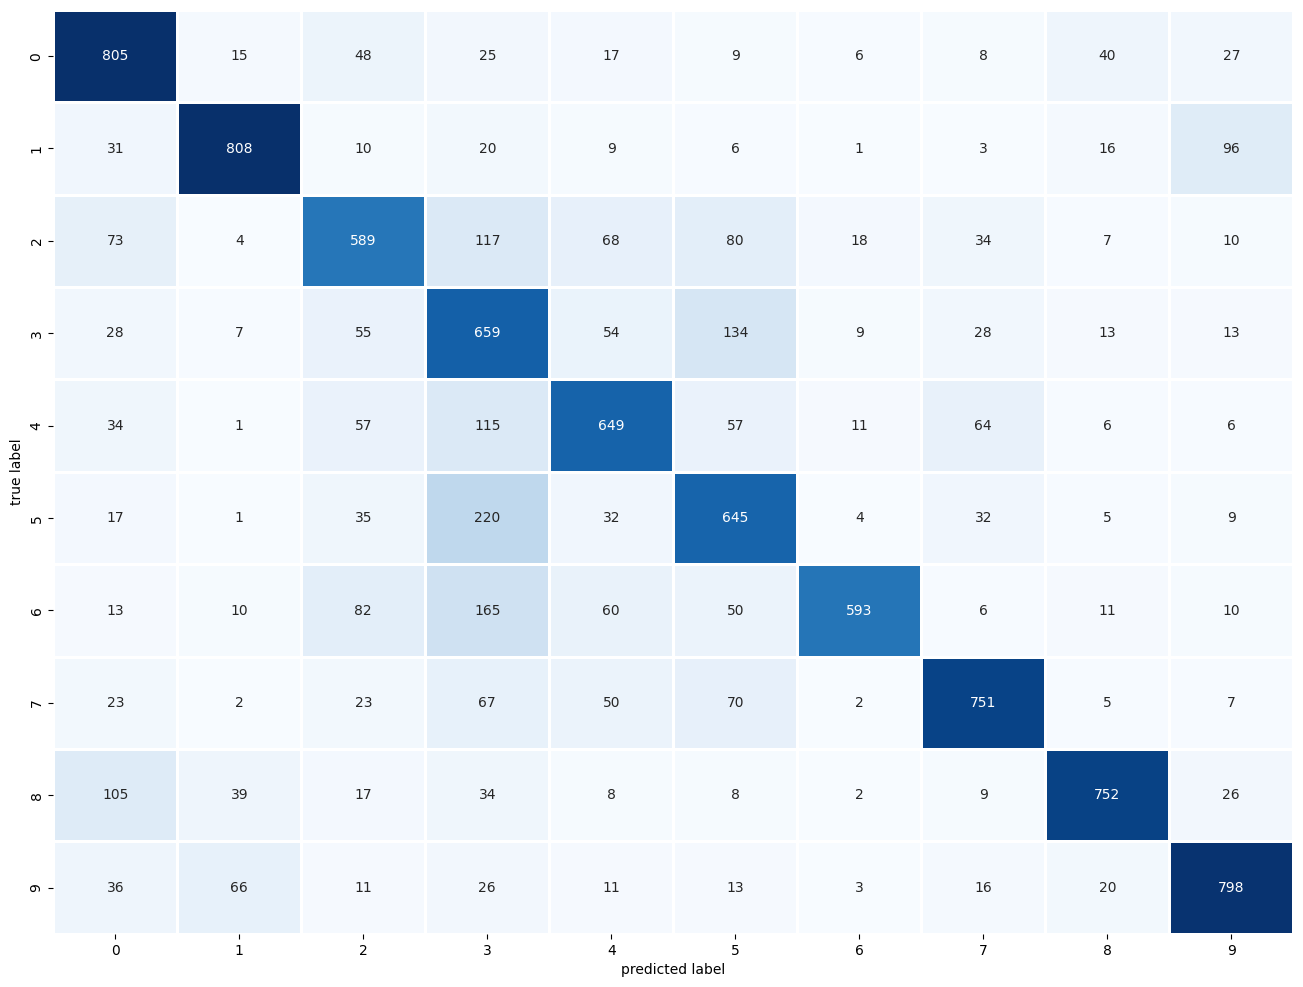

In [161]:
plot_confusion_matrix(y_test,pred3)

#Experiment 4: CNN with 3 layers (no regulationzation)


In [162]:
#Build CNN Model 4
k.clear_session()
model_4 = Sequential([
  Conv2D(filters=128, kernel_size=(3, 3),padding = 'same', activation=tf.nn.relu,input_shape=x_train_norm.shape[1:]),
  MaxPool2D((2, 2),strides=2),
  Conv2D(filters=100, kernel_size=(3, 3),padding = 'same', activation=tf.nn.relu),
  MaxPool2D((2, 2),strides=2),
  Conv2D(filters=50,kernel_size=(3, 3), padding = 'same', activation=tf.nn.relu),
  Flatten(),
  Dense(units=10, activation=tf.nn.softmax)
  ])

In [163]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 100)       115300    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 100)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 50)          45050     
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [164]:
model_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [215]:
history_4 = model_4.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=64
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])

Epoch 1/200
 40/704 [>.............................] - ETA: 2:20 - loss: 0.5043 - accuracy: 0.8219

KeyboardInterrupt: ignored

In [170]:
print('Model performance with training set')
model_4.evaluate(x_train_norm, y_train_split)

print('Evaluating model performance with validation set')
model_4.evaluate(x_test_norm, y_test)

Model performance with training set
1407/1407 [==============================] - 39s 28ms/step - loss: 0.5678 - accuracy: 0.8019
Evaluating model performance with validation set
313/313 [==============================] - 9s 28ms/step - loss: 0.8578 - accuracy: 0.7058


[0.8578062653541565, 0.7057999968528748]

In [174]:
#Predictions
preds4 = model_4.predict(x_test_norm)
pred4=np.argmax(preds4, axis=1)

313/313 [==============================] - 9s 27ms/step


In [175]:
print_validation_report(y_test,pred4)

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.64      0.71      1000
           1       0.88      0.77      0.82      1000
           2       0.66      0.54      0.60      1000
           3       0.54      0.52      0.53      1000
           4       0.53      0.79      0.63      1000
           5       0.70      0.54      0.61      1000
           6       0.71      0.81      0.76      1000
           7       0.77      0.75      0.76      1000
           8       0.79      0.87      0.83      1000
           9       0.78      0.83      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.70     10000
weighted avg       0.72      0.71      0.70     10000

Accuracy Score: 0.7058
Root Mean Square Error: 2.244036541591959


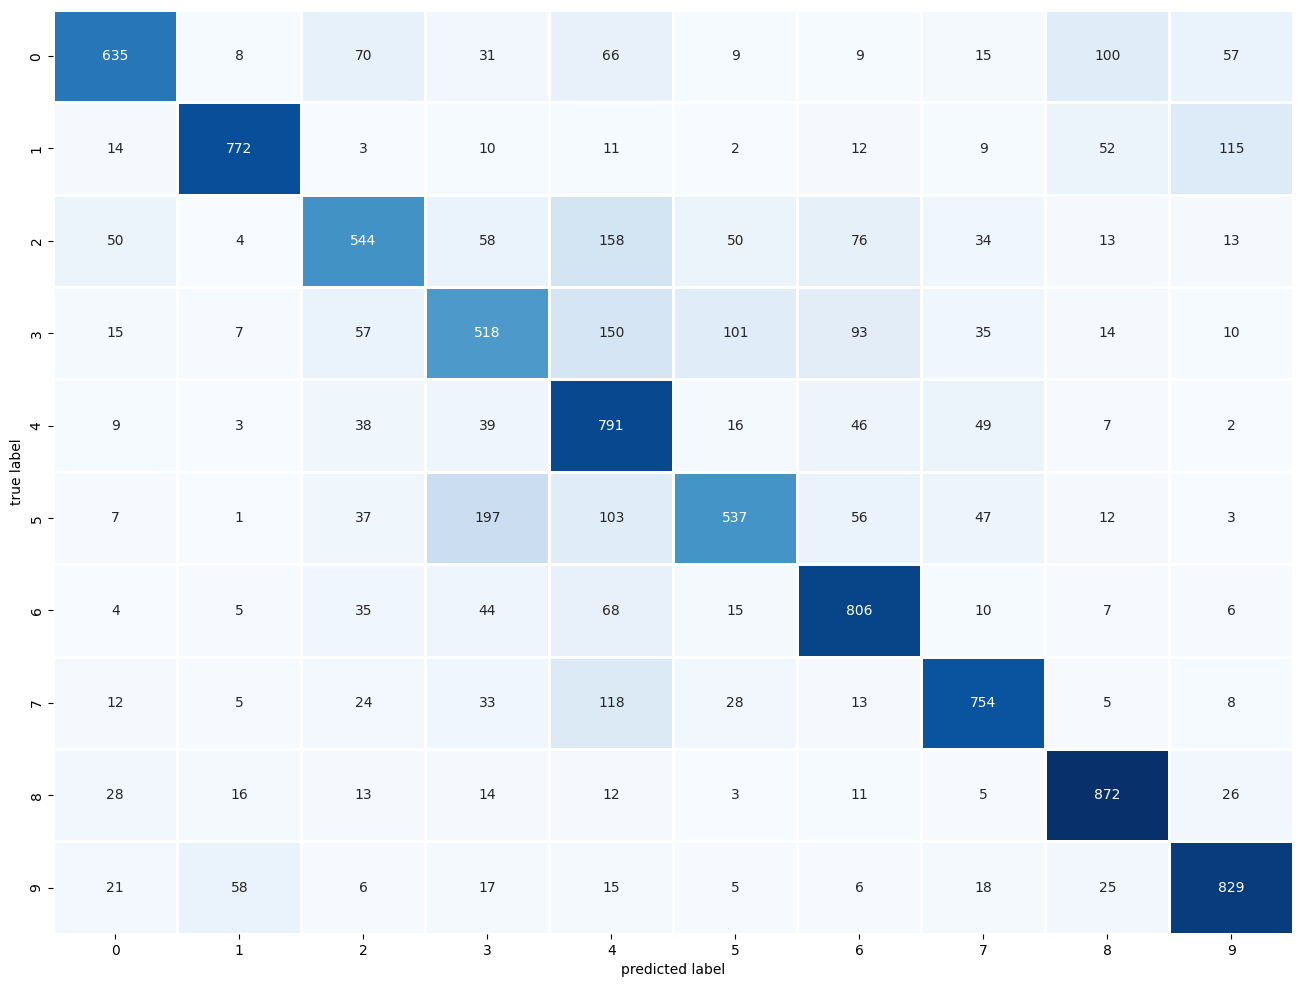

In [176]:
plot_confusion_matrix(y_test,pred4)

#Experiment 5: DNN with 2 layers (w/ regulationzation)





In [38]:
num_classes = 10

In [40]:
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils

In [46]:
y_train_ = np_utils.to_categorical(y_train_split, num_classes)
y_test_ = np_utils.to_categorical(y_test, num_classes)
y_valid_ = np_utils.to_categorical(y_valid_split, num_classes)

In [48]:
print(x_train_norm.shape, x_valid_norm.shape, x_test_norm.shape)
print(y_train_.shape, y_valid_split.shape, y_test.shape)


(45000, 32, 32, 3) (5000, 32, 32, 3) (10000, 32, 32, 3)
(45000, 10) (5000, 1) (10000, 1)


In [53]:
#Build model
k.clear_session()
model_5 = Sequential([
    Dense(input_shape=x_train.shape[1:], units = 100, activation = tf.nn.relu, kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    Dropout(0.3),
    Dense(units=50,activation=tf.nn.softmax,kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    BatchNormalization(),
    Flatten(),
    Dense(units = 10, activation = tf.nn.softmax)])



In [54]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32, 32, 100)       400       
                                                                 
 dropout (Dropout)           (None, 32, 32, 100)       0         
                                                                 
 dense_1 (Dense)             (None, 32, 32, 50)        5050      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 50)       200       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                512010    
                                                        

In [55]:
# Compile
model_5.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])


In [56]:
# Fit
history_5 = model_5.fit(
    x_train_norm
    ,y_train_
    ,epochs = 20
    ,validation_data=(x_valid_norm, y_valid_)
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy')],
    shuffle=True)

Epoch 1/20
1407/1407 [==============================] - 72s 50ms/step - loss: 1.6996 - accuracy: 0.4181 - val_loss: 1.6533 - val_accuracy: 0.4306
Epoch 2/20
1407/1407 [==============================] - 68s 48ms/step - loss: 1.5577 - accuracy: 0.4634 - val_loss: 1.5681 - val_accuracy: 0.4536
Epoch 3/20
1407/1407 [==============================] - 69s 49ms/step - loss: 1.5073 - accuracy: 0.4808 - val_loss: 1.5442 - val_accuracy: 0.4656
Epoch 4/20
1407/1407 [==============================] - 68s 48ms/step - loss: 1.4735 - accuracy: 0.4935 - val_loss: 1.5335 - val_accuracy: 0.4592


In [57]:
#Predictions
preds5 = model_5.predict(x_test_norm)
pred5=np.argmax(preds5, axis=1)

313/313 [==============================] - 4s 13ms/step


In [59]:
# Checking the model accuracy with the test data
loss_5, accuracy_5 = model_5.evaluate(x_test_norm, y_test_)

313/313 [==============================] - 4s 14ms/step - loss: 1.5048 - accuracy: 0.4766


In [60]:
print_validation_report(y_test,pred5)

Classification Report
              precision    recall  f1-score   support

           0       0.55      0.54      0.54      1000
           1       0.54      0.64      0.59      1000
           2       0.45      0.26      0.33      1000
           3       0.30      0.45      0.36      1000
           4       0.36      0.38      0.37      1000
           5       0.53      0.19      0.28      1000
           6       0.46      0.64      0.54      1000
           7       0.52      0.53      0.52      1000
           8       0.67      0.53      0.59      1000
           9       0.52      0.61      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000

Accuracy Score: 0.4766
Root Mean Square Error: 3.1519835024948972


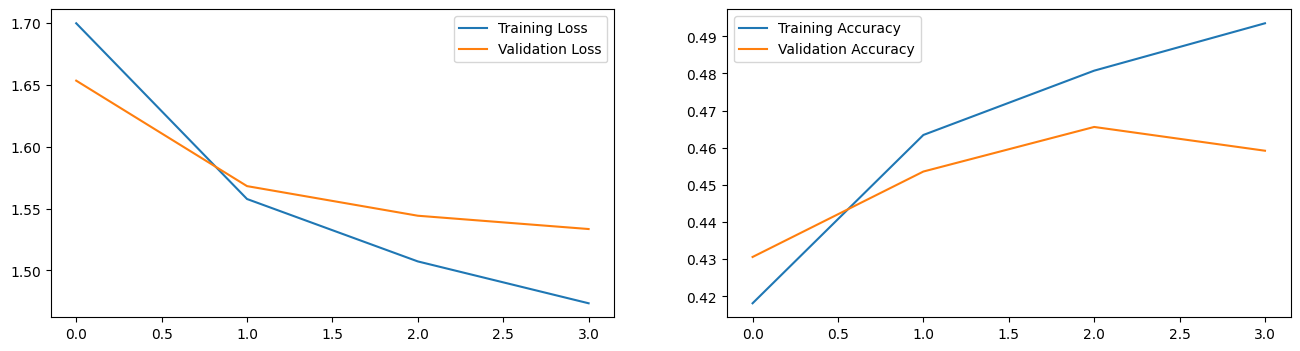

In [99]:
plot_history(history_5)

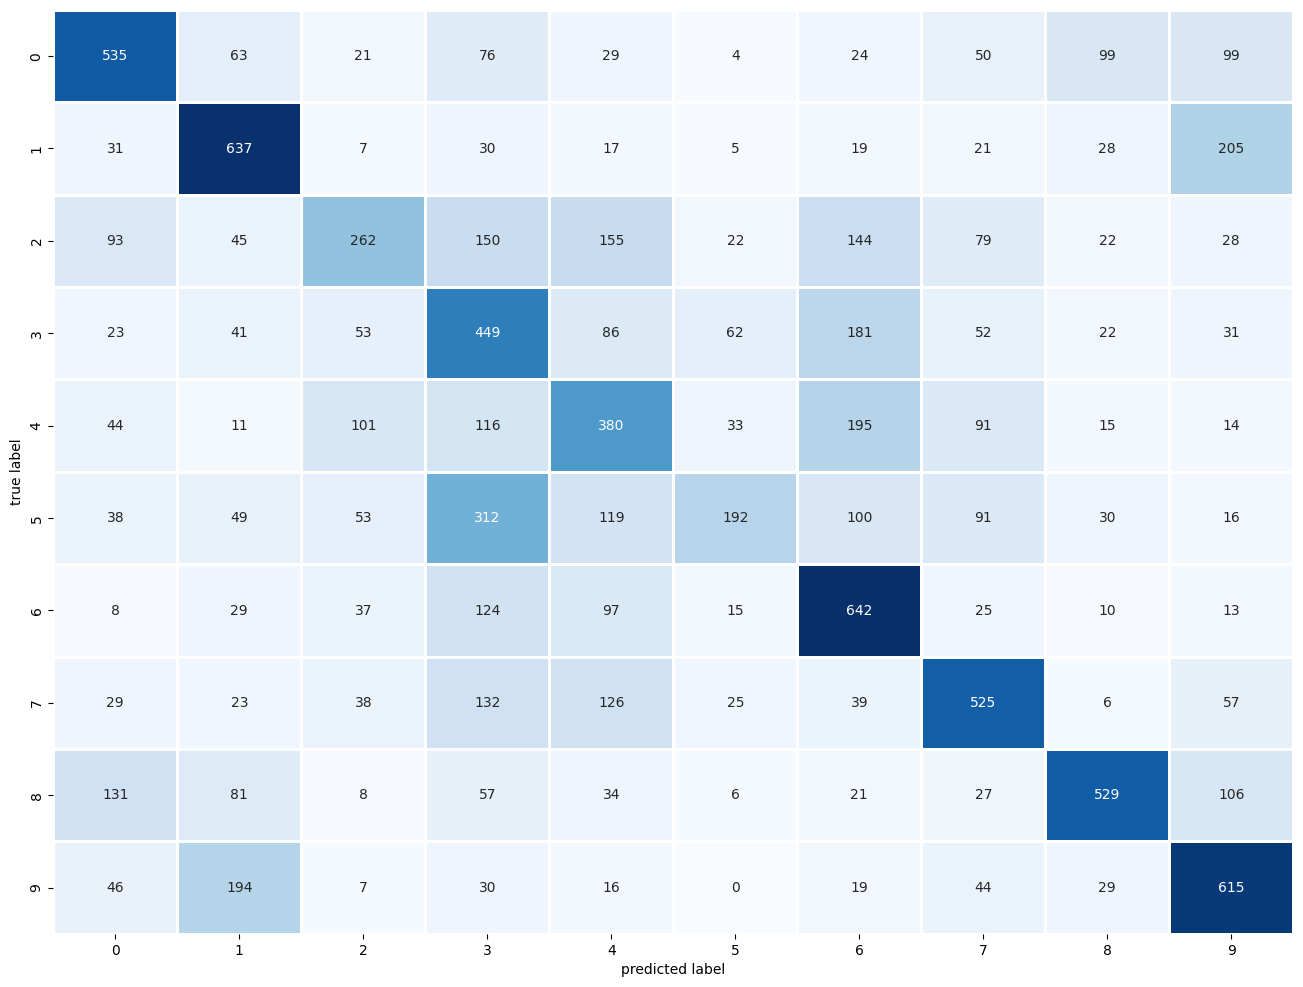

In [62]:
plot_confusion_matrix(y_test,pred5)

#Experiment 6: DNN with 3 layers (w/ regulationzation)

In [63]:
#Build model
model_6 = Sequential([
    Dense(input_shape=x_train.shape[1:], units = 125, activation = tf.nn.relu),
    Dense(units = 60, activation = tf.nn.softmax, kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    Dense(units=30,activation=tf.nn.softmax,kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    BatchNormalization(),
    Flatten(),
    Dense(units = 10, activation="softmax")])

In [64]:
# Compile
model_6.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

In [65]:
# Fit
history_6 = model_6.fit(
    x_train_norm
    ,y_train_
    ,epochs = 10
    ,validation_data=(x_valid_norm, y_valid_)
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])

Epoch 1/10
1407/1407 [==============================] - 111s 47ms/step - loss: 1.8302 - accuracy: 0.3749 - val_loss: 2.3589 - val_accuracy: 0.2998
Epoch 2/10
1407/1407 [==============================] - 67s 47ms/step - loss: 1.6699 - accuracy: 0.4324 - val_loss: 1.6745 - val_accuracy: 0.4202
Epoch 3/10
1407/1407 [==============================] - 67s 48ms/step - loss: 1.6101 - accuracy: 0.4523 - val_loss: 1.8701 - val_accuracy: 0.3698
Epoch 4/10
1407/1407 [==============================] - 67s 48ms/step - loss: 1.5584 - accuracy: 0.4684 - val_loss: 1.6331 - val_accuracy: 0.4298
Epoch 5/10
1407/1407 [==============================] - 67s 48ms/step - loss: 1.5243 - accuracy: 0.4790 - val_loss: 1.7940 - val_accuracy: 0.3832
Epoch 6/10
1407/1407 [==============================] - 67s 48ms/step - loss: 1.5029 - accuracy: 0.4854 - val_loss: 1.6660 - val_accuracy: 0.4310
Epoch 7/10
1407/1407 [==============================] - 69s 49ms/step - loss: 1.4824 - accuracy: 0.4943 - val_loss: 1.7384 

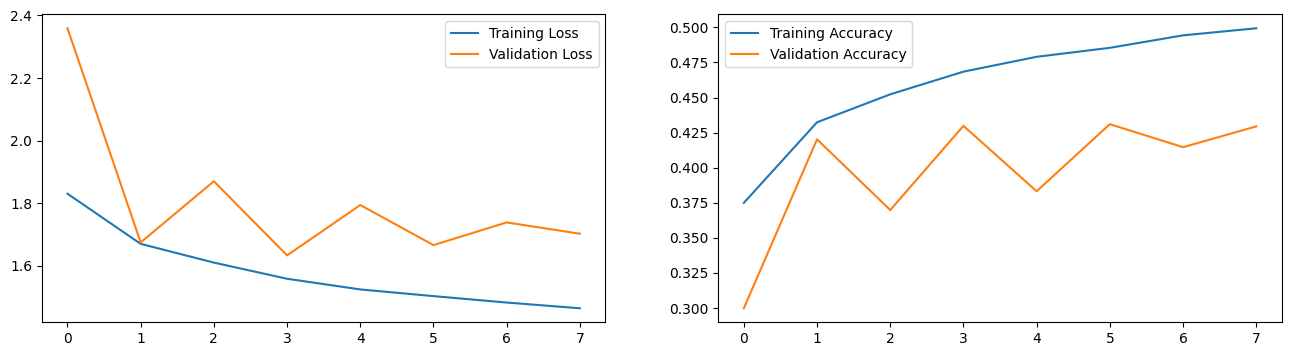

In [102]:
plot_history(history_6)

In [66]:
#Predictions
preds6 = model_6.predict(x_test_norm)
pred6=np.argmax(preds6, axis=1)

313/313 [==============================] - 5s 17ms/step


In [67]:
print_validation_report(y_test,pred6)

Classification Report
              precision    recall  f1-score   support

           0       0.47      0.55      0.51      1000
           1       0.42      0.73      0.53      1000
           2       0.64      0.04      0.08      1000
           3       0.37      0.21      0.27      1000
           4       0.51      0.19      0.28      1000
           5       0.33      0.48      0.39      1000
           6       0.43      0.57      0.49      1000
           7       0.45      0.58      0.51      1000
           8       0.63      0.49      0.55      1000
           9       0.44      0.54      0.48      1000

    accuracy                           0.44     10000
   macro avg       0.47      0.44      0.41     10000
weighted avg       0.47      0.44      0.41     10000

Accuracy Score: 0.4387
Root Mean Square Error: 3.3860891896109293


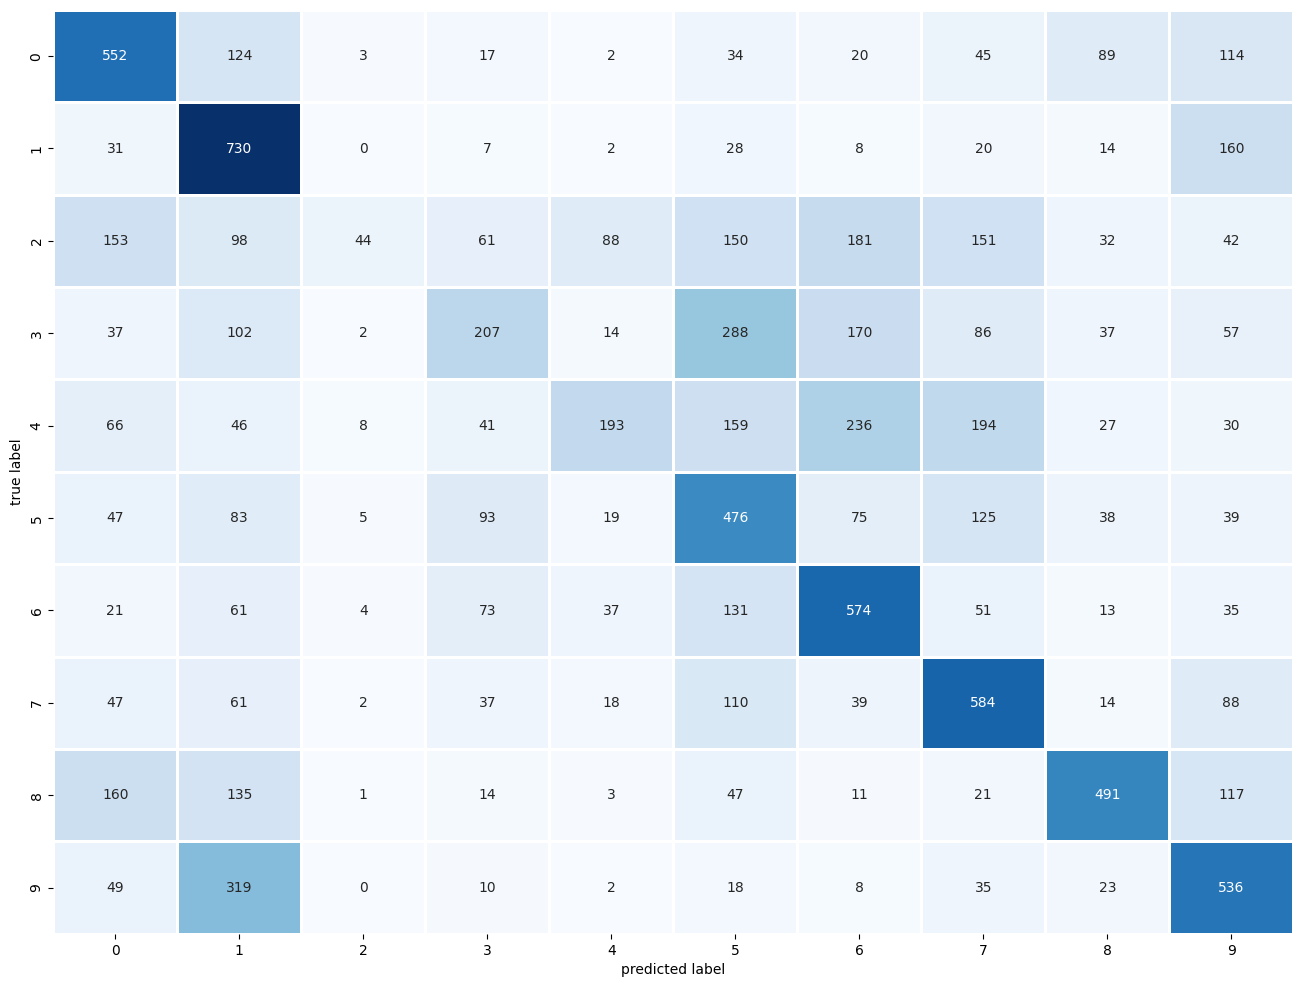

In [68]:
plot_confusion_matrix(y_test,pred6)

#Experiment 7: CNN with 2 layers (w/ regulationzation)

In [87]:
model_7 = Sequential([
  Conv2D(filters=32, kernel_size=(2, 2), activation=tf.nn.relu,input_shape=x_train_norm[0].shape, padding = 'same'),
  BatchNormalization(),
  Dropout(0.3),
  Conv2D(filters=64, kernel_size=(2, 2), activation=tf.nn.relu),
  MaxPool2D((2, 2)),
  Dropout(0.3),
  Flatten(),
  Dense(units=100,activation=tf.nn.softmax,kernel_regularizer=tf.keras.regularizers.L2(0.001)),
  Dropout(0.3),
  Dense(units=10, activation=tf.nn.softmax)
])

In [88]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        416       
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_15 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 31, 31, 64)        8256      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_16 (Dropout)        (None, 15, 15, 64)       

In [97]:
model_7.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [98]:
history_7 = model_7.fit(x_train_norm
                    ,y_train_
                    ,epochs=200
                    ,batch_size=64
                    ,validation_data=(x_valid_norm, y_valid_)
                    ,callbacks=[
                     tf.keras.callbacks.ModelCheckpoint("CNN_model.h5",save_best_only=True,save_weights_only=False)
                     ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    ]
                   )

Epoch 1/200
704/704 [==============================] - 56s 77ms/step - loss: 2.2247 - accuracy: 0.1462 - val_loss: 2.1266 - val_accuracy: 0.1790
Epoch 2/200
704/704 [==============================] - 54s 77ms/step - loss: 2.1396 - accuracy: 0.1586 - val_loss: 2.0993 - val_accuracy: 0.1844
Epoch 3/200
704/704 [==============================] - 54s 77ms/step - loss: 2.1110 - accuracy: 0.1723 - val_loss: 2.0345 - val_accuracy: 0.2008
Epoch 4/200
704/704 [==============================] - 53s 75ms/step - loss: 2.0679 - accuracy: 0.1966 - val_loss: 1.9665 - val_accuracy: 0.2432
Epoch 5/200
704/704 [==============================] - 53s 75ms/step - loss: 2.0534 - accuracy: 0.2036 - val_loss: 1.9372 - val_accuracy: 0.2370
Epoch 6/200
704/704 [==============================] - 54s 77ms/step - loss: 2.0242 - accuracy: 0.2071 - val_loss: 1.8962 - val_accuracy: 0.2514
Epoch 7/200
704/704 [==============================] - 53s 75ms/step - loss: 2.0041 - accuracy: 0.2116 - val_loss: 1.8788 - val_ac

In [100]:
#Predictions
preds7 = model_7.predict(x_test_norm)
pred7=np.argmax(preds7, axis=1)

313/313 [==============================] - 3s 10ms/step


In [101]:
print_validation_report(y_test,pred7)

Classification Report
              precision    recall  f1-score   support

           0       0.59      0.75      0.66      1000
           1       0.62      0.60      0.61      1000
           2       0.44      0.57      0.50      1000
           3       0.44      0.50      0.47      1000
           4       0.58      0.65      0.61      1000
           5       0.52      0.68      0.59      1000
           6       0.90      0.53      0.67      1000
           7       0.74      0.68      0.71      1000
           8       0.79      0.70      0.75      1000
           9       0.67      0.34      0.46      1000

    accuracy                           0.60     10000
   macro avg       0.63      0.60      0.60     10000
weighted avg       0.63      0.60      0.60     10000

Accuracy Score: 0.601
Root Mean Square Error: 2.9009481208735877


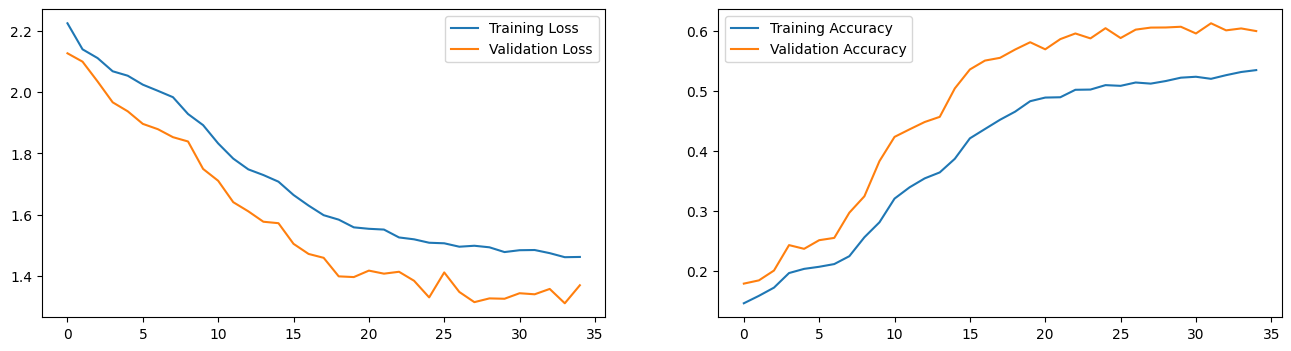

In [103]:
plot_history(history_7)

In [ ]:
# Checking the model accuracy with the test data
loss_7, accuracy_7 = model_7.evaluate(x_test_norm, y_test_encoded)

#Experiment 8: CNN with 3 layers (w/ regulationzation)

In [105]:
model_8 = Sequential([
  Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu,input_shape=x_train_norm.shape[1:]),
  MaxPool2D((2, 2)),
  Dropout(0.3),
  Conv2D(filters=256, kernel_size=(3, 3), activation=tf.nn.relu),
  MaxPool2D((2, 2)),
  Dropout(0.3),
  Conv2D(filters=512, kernel_size=(3, 3),  activation=tf.nn.relu),
  MaxPool2D((2, 2)),
  Dropout(0.3),
  Flatten(),
  Dense(units=384,activation=tf.nn.softmax,kernel_regularizer=tf.keras.regularizers.L2(0.001)),
  Dropout(0.3),
  Dense(units=10, activation=tf.nn.softmax)
])

In [106]:
# Compile
model_8.compile(optimizer='adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])



In [ ]:
# Fit
history_8 = model_8.fit(
    x_train_norm
    ,y_train_
    ,epochs = 30
    ,validation_data=(x_valid_norm, y_valid_)
    ,callbacks=[tf.keras.callbacks.ModelCheckpoint("CNN_model.h5",save_best_only=True,save_weights_only=False)
    ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
    ])

Epoch 1/30
1407/1407 [==============================] - 208s 147ms/step - loss: 2.2580 - accuracy: 0.1381 - val_loss: 2.2205 - val_accuracy: 0.1596
Epoch 2/30
1407/1407 [==============================] - 205s 146ms/step - loss: 2.1331 - accuracy: 0.1764 - val_loss: 2.0171 - val_accuracy: 0.2160
Epoch 3/30
1407/1407 [==============================] - 205s 146ms/step - loss: 2.0498 - accuracy: 0.2034 - val_loss: 1.9418 - val_accuracy: 0.2838
Epoch 4/30
1407/1407 [==============================] - 206s 146ms/step - loss: 1.9824 - accuracy: 0.2335 - val_loss: 1.8460 - val_accuracy: 0.3090
Epoch 5/30
1407/1407 [==============================] - 205s 146ms/step - loss: 1.9192 - accuracy: 0.2594 - val_loss: 1.7856 - val_accuracy: 0.3576
Epoch 6/30
1407/1407 [==============================] - 208s 148ms/step - loss: 1.8423 - accuracy: 0.3149 - val_loss: 1.6479 - val_accuracy: 0.4284
Epoch 7/30
1407/1407 [==============================] - 205s 145ms/step - loss: 1.7671 - accuracy: 0.3450 - val_

In [ ]:
#Predictions
preds8 = model_8.predict(x_test_norm)
pred8=np.argmax(preds8, axis=1)

In [ ]:
print_validation_report(y_test,pred8)

In [ ]:
plot_history(history_8)

In [ ]:
plot_confusion_matrix(y_test,pred8)

#Experiment 9: CNN with 5 layers (w/ regulationzation and BatchNormalization)

In [ ]:
model_9 = Sequential([
  Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu,input_shape=x_train_norm.shape[1:]),
  MaxPool2D((2, 2)),
  Dropout(0.3),
  Conv2D(filters=256, kernel_size=(3, 3), activation=tf.nn.relu),
  MaxPool2D((2, 2)),
  Dropout(0.3),
  Conv2D(filters=512, kernel_size=(3, 3), activation=tf.nn.relu),
  MaxPool2D((2, 2)),
  Dropout(0.3),
  Conv2D(filters=512, kernel_size=(3, 3), activation=tf.nn.relu),
  MaxPool2D((2, 2)),
  Dropout(0.3),
  Conv2D(filters=256, kernel_size=(3, 3), activation=tf.nn.relu),
  MaxPool2D((2, 2)),
  Dropout(0.3),
  Flatten()
  Dense(units=384,activation=tf.nn.softmax,kernel_regularizer=tf.keras.regularizers.L2(0.001)),
  BatchNormalization(),
  Dropout(0.3),
  Dense(units=10, activation=tf.nn.softmax)
])

In [ ]:
# Compile
model_9.compile(optimizer=tf.keras.optimizers.RMSprop(momentum=0.9),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

# Fit
history_9 = model_9.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])

In [ ]:
# Checking the model accuracy with the test data
loss_9, accuracy_9 = model_9.evaluate(x_test_norm, y_test_encoded)

In [ ]:
#Predictions
preds9 = model_9.predict(x_test_norm)
pred9=np.argmax(preds9, axis=1)

In [ ]:
print_validation_report(y_test,pred9)

In [ ]:
plot_confusion_matrix(y_test,pred9)

#Experiment 10: CNN with 5 layers (w/ regulationzation, BatchNormalization and stride)

In [ ]:
model_10 = Sequential([
  Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=x_train_norm.shape[1:]),
  MaxPool2D((2, 2),strides=2),
  Dropout(0.3),
  Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu),
  MaxPool2D((2, 2),strides=2),
  Dropout(0.3),
  Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu),
  MaxPool2D((2, 2),strides=2),
  Dropout(0.3),
  Flatten(),
  Dense(units=384,activation=tf.nn.softmax,kernel_regularizer=tf.keras.regularizers.L2(0.001)),
  BatchNormalization(),
  Dropout(0.3),
  Dense(units=10, activation=tf.nn.softmax)
])

In [ ]:
model_10.summary()


In [ ]:
# Compile
model_10.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

# Fit
history_10 = model_10.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.200
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])



In [ ]:
# Checking the model accuracy with the test data
loss_10, accuracy_10 = model_10.evaluate(x_test_norm, y_test_encoded)

In [ ]:
#Predictions
preds10 = model_10.predict(x_test_norm)
pred10=np.argmax(preds10, axis=1)

In [ ]:
print_validation_report(y_test,pred10)

In [ ]:
plot_confusion_matrix(y_test,pred10)

In [ ]:
# Checking the model accuracy with the test data
loss_7, accuracy_7 = model_7.evaluate(x_test_norm, y_test_encoded)

In [ ]:
y_pred=pd.DataFrame(vit_classifier.predict(x_test))
y_pred['y_pred'] = y_pred.idxmax(axis=1)
y_pred['true_value']=y_test
y_pred = y_pred['y_pred'].to_numpy()
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(x_test[i].astype(int))
    plt.xlabel('pred={}, act={}'.format(image_dict[y_pred[i].item()], image_dict[y_test[i].item()]), fontsize=15)
plt.show()
